In [1]:
import glob
import json

import numpy as np
from matplotlib import pyplot as plt

## All benchmarks, all hyperparameters are learned

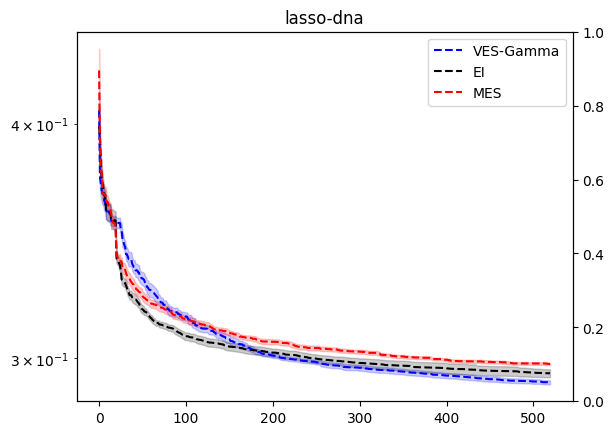

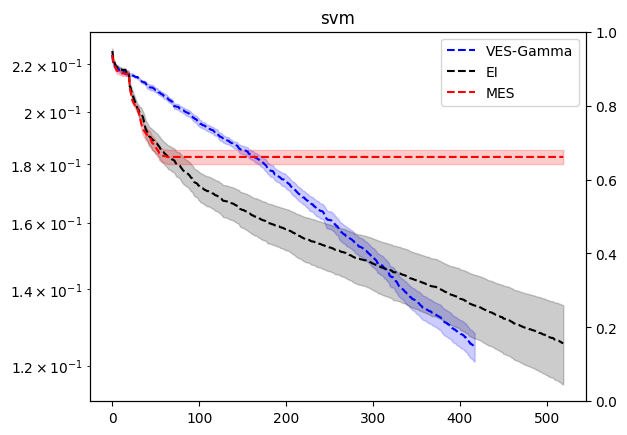

In [2]:
benchmarks = ['lasso-dna', 'svm']

run_dirs = glob.glob('../results/ves_add_benchmarks/*')

NUM_PATHS = 256

for benchmark in benchmarks:
    
    relevant_dirs = [d for d in run_dirs if json.load(open(f'{d}/args.json'))['benchmark'] == benchmark]

    ei_dirs = [d for d in relevant_dirs if f'{d}/train_x_ei.npy' in glob.glob(f'{d}/*')]
    mes_dirs = [d for d in relevant_dirs if f'{d}/train_x_mes.npy' in glob.glob(f'{d}/*')]
    ves_dirs = [d for d in relevant_dirs if f'{d}/train_x_ves.npy' in glob.glob(f'{d}/*')]


    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    ves_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ves.npy')) for d in ves_dirs]
    min_len = min([len(y) for y in ves_y])
    ves_y = [y[:min_len] for y in ves_y]
    ves_y = -np.stack(ves_y).squeeze(-1)
    ves_y_mean = ves_y.mean(axis=0)
    ves_y_std = ves_y.std(axis=0)/ np.sqrt(len(ves_y))
        
    ei_y = [np.maximum.accumulate(np.load(f'{d}/train_y_ei.npy')) for d in ei_dirs]
    min_len = min([len(y) for y in ei_y])
    ei_y = [y[:min_len] for y in ei_y]
    ei_y = -np.stack(ei_y).squeeze(-1)
    ei_y_mean = ei_y.mean(axis=0)
    ei_y_std = ei_y.std(axis=0)/ np.sqrt(len(ei_y))
    
    mes_y = [np.maximum.accumulate(np.load(f'{d}/train_y_mes.npy')) for d in mes_dirs]
    min_len = min([len(y) for y in mes_y])
    mes_y = [y[:min_len] for y in mes_y]
    mes_y = -np.stack(mes_y).squeeze(-1)
    mes_y_mean = mes_y.mean(axis=0)
    mes_y_std = mes_y.std(axis=0)/ np.sqrt(len(mes_y))

    ax.plot(ves_y_mean, label='VES-Gamma', color='blue', linestyle='--')
    ax.fill_between(np.arange(len(ves_y_mean)), ves_y_mean-ves_y_std, ves_y_mean+ves_y_std, alpha=0.2, color='blue')
    
    ax.plot(ei_y_mean, label='EI', color='black', linestyle='--')
    ax.fill_between(np.arange(len(ei_y_mean)), ei_y_mean-ei_y_std, ei_y_mean+ei_y_std, alpha=0.2, color='black')
    
    ax.plot(mes_y_mean, label='MES', color='red', linestyle='--')
    ax.fill_between(np.arange(len(mes_y_mean)), mes_y_mean-mes_y_std, mes_y_mean+mes_y_std, alpha=0.2, color='red')
    
    ax.legend()
    ax.set_yscale('log')
    ax.set_title(f'{benchmark}')

    plt.show()
    
    